In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# this is the code used to run the following on colab

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [4]:
# link ='https://drive.google.com/open?id=1ITvhUlnPx5LvNC6kPSGta1vro5cbr8Sp'
# _,id=link.split("=")
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('kaggle_train_processed_team.csv')  

rush = pd.read_csv('kaggle_train_processed_team.csv')


In [5]:
rush = rush.iloc[:,2:]

In [6]:
rush.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection',
       'DefendersInTheBox_vs_Distance', 'HomePossesion', 'Field_eq_Possession',
       'HomeField', 'PlayerBMI', 'PlayDuration', 'PlayerAge', 'Rusher',
       'YardsLeft', 'Off_Pass_Cmp', 'Off_Pass_Att', 'Off_Pass_CmpR',
       'Off_Pass_TD', 'Off_Pass_IntR', 'Off_Pass

In [7]:
# create play-level data
play_related_columns = ['GameId','PlayId','Season','YardLine','Quarter','HomePossesion','Down', 'Distance',\
                        'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'GameClock',\
                        'OffenseFormation', 'OffensePersonnel', 'DefendersInTheBox',\
                        'DefensePersonnel', 'PlayDirection', 'PlayDuration',\
                        'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week',\
                        'Location', 'StadiumType', 'Turf', 'GameWeather', 'Temperature',\
                        'Humidity', 'WindSpeed', 'WindDirection','Yards']
rush = rush[(rush['NflIdRusher']) == (rush['NflId'])]
rush_plays = rush[play_related_columns]
# add more analysis: distance vs defendersinthebox;whether teams make different choice in different quater

In [8]:
pd.set_option('display.max_columns',500)
rush_plays.head()

,GameId,PlayId,Season,YardLine,Quarter,HomePossesion,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,GameClock,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,PlayDuration,HomeTeamAbbr,VisitorTeamAbbr,Week,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Yards
18,2017090700,20170907000118,2017,35,1,True,3,2,0,0,854.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",False,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,8
40,2017090700,20170907000139,2017,43,1,True,1,10,0,0,832.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",False,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,3
62,2017090700,20170907000189,2017,35,1,True,1,10,0,0,782.0,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",False,2.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,5
84,2017090700,20170907000345,2017,2,1,True,2,2,0,0,732.0,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",9.0,"4 DL, 4 LB, 3 DB",False,2.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,2
98,2017090700,20170907000395,2017,25,1,False,1,10,7,0,728.0,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",True,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,7


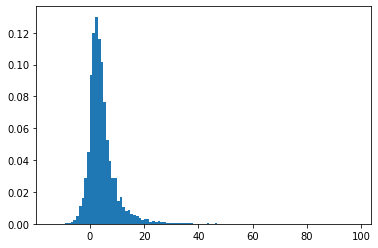

In [9]:
yards_distribution = plt.hist(rush_plays['Yards'],bins = np.arange(rush_plays['Yards'].values.min(),\
                                                                   rush_plays['Yards'].values.max()),\
                              density = True)

In [10]:
yards_distribution[1][yards_distribution[0].argmax()] # the bin of highest proportion
# Basically, the yards data is centered around 2

2

In [11]:
rush_plays.Yards.describe()
# And it is obvious that this data is highly skewed.
# I will recommend to find the outlies and see if we can identify the factors that leads to these extreme performance

count    22946.000000
mean         4.011113
std          5.720428
min        -14.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: Yards, dtype: float64

In [12]:
# We define 'outliers' as data points that located above and below three times std
# Add a tag to distinguish these outliers
# tag -1 if the data located on the left side of our chosen interval; 1 if on the right
lower_bound = rush_plays.Yards.mean()-3*rush_plays.Yards.std()
upper_bound = rush_plays.Yards.mean()+3*rush_plays.Yards.std()
conditions = [rush_plays.Yards < lower_bound, rush_plays.Yards > upper_bound]
choices = ['-1','1']
rush_plays = rush_plays.assign(outliers = np.select(conditions, choices,default = '0'))

In [13]:
print(rush_plays.groupby(rush_plays['outliers']).size())
rush_plays.groupby(rush_plays['outliers']).mean()
# GameId, PlayId, Season, Quarter, NflIdRusher, week are meaningless here though they are numarical data
# Yardline may have some impact on yards
# rush plays with higher 'Yardline' value tend to have extreme performance
# Scores before play, number of defensers in the box, temperature seem to have impact 
# We'll try to figure it out in later ananlysis

outliers
-1        1
0     22598
1       347
dtype: int64


,GameId,PlayId,Season,YardLine,Quarter,HomePossesion,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,GameClock,DefendersInTheBox,PlayDirection,PlayDuration,Week,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Yards
outliers,,,,,,,,,,,,,,,,,,,,,,,
-1,2.017122e+09,2.017122e+13,2017.000000,32.000000,3.000000,1.000000,1.000000,10.000000,17.000000,12.000000,105.000000,7.000000,0.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,50.000000,47.000000,1.000000,1.000000,-14.000000
0,2.017593e+09,2.017593e+13,2017.485485,28.418356,2.503584,0.508762,1.520798,8.317816,11.138685,9.495442,464.623551,6.944944,0.496814,1.264271,9.096778,0.811460,0.554076,0.287614,60.444309,55.657499,7.392239,0.932871,3.582131
1,2.017667e+09,2.017667e+13,2017.559078,34.080692,2.521614,0.533141,1.556196,8.455331,11.625360,10.060519,468.236311,6.757925,0.515850,1.305476,9.121037,0.832765,0.533141,0.335735,60.103774,55.825581,7.106209,0.984642,32.000000


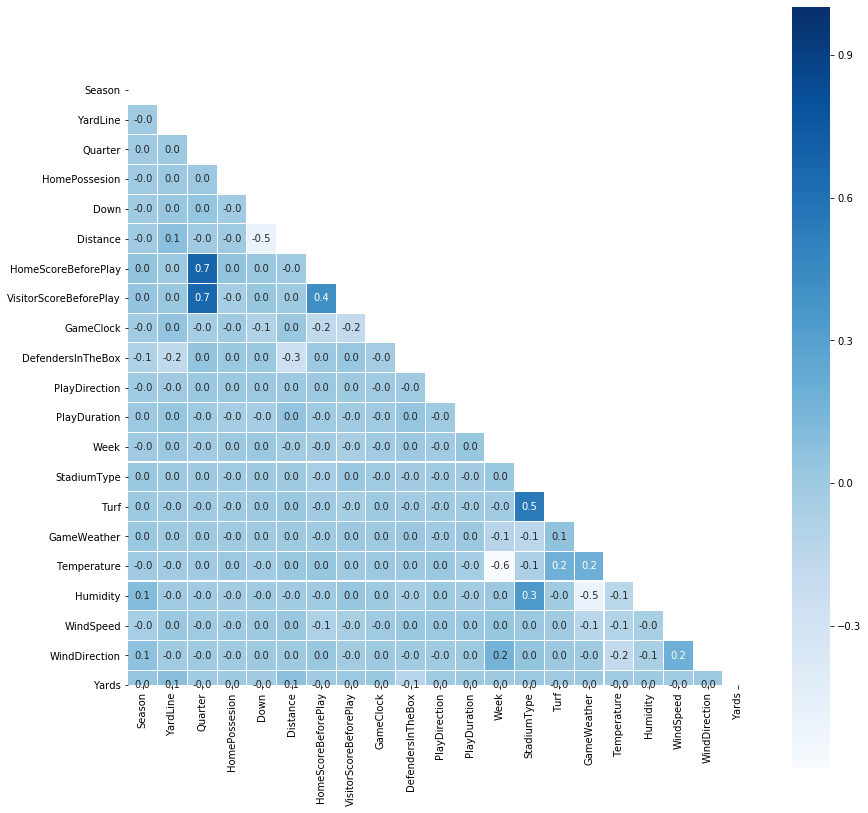

In [14]:
fig,ax = plt.subplots(figsize=(14,14))
corr = rush_plays.iloc[:,2:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, cmap = 'Blues', mask=mask, linewidths=.1, fmt='.1f', square = True)
plt.show()
# and this relationship figure is very similar on normal yards group

basic take-aways from the relationship analysis above

Most of these variables has limited linear relationship with our target viarable 'Yards', which implies that linear regression might not work well. 

Additionally, there are no strong correlations between features too. That could save us from dealing with colinearity

In [15]:
# change the home and visit score to possession and defensive score
rush_plays = rush_plays.assign(PossesionScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == True,\
                                                                 x['HomeScoreBeforePlay'],\
                                                                 x['VisitorScoreBeforePlay']))
rush_plays = rush_plays.assign(DefensiveScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == False,\
                                                                 x['HomeScoreBeforePlay'],\
                                                                 x['VisitorScoreBeforePlay']))

In [16]:
rush_plays
# rush_plays.columns

,GameId,PlayId,Season,YardLine,Quarter,HomePossesion,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,GameClock,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,PlayDuration,HomeTeamAbbr,VisitorTeamAbbr,Week,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Yards,outliers,PossesionScoreBeforePlay,DefensiveScoreBeforePlay
18,2017090700,20170907000118,2017,35,1,True,3,2,0,0,854.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",False,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,8,0,0,0
40,2017090700,20170907000139,2017,43,1,True,1,10,0,0,832.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",False,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,3,0,0,0
62,2017090700,20170907000189,2017,35,1,True,1,10,0,0,782.0,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",False,2.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,5,0,0,0
84,2017090700,20170907000345,2017,2,1,True,2,2,0,0,732.0,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",9.0,"4 DL, 4 LB, 3 DB",False,2.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,2,0,0,0
98,2017090700,20170907000395,2017,25,1,False,1,10,7,0,728.0,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",True,1.0,NE,KC,1,"Foxborough, MA",1.0,False,1.0,63.0,77.0,8.0,1.25,7,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504707,2018123015,20181230153910,2018,35,4,False,1,10,24,21,183.0,I_FORM,"2 RB, 1 TE, 2 WR",8.0,"4 DL, 3 LB, 4 DB",False,1.0,SEA,ARZ,17,"Seattle, WA",1.0,False,-1.0,45.0,76.0,5.0,0.75,1,0,21,24
504741,2018123015,20181230154035,2018,25,4,True,1,10,24,24,109.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",True,1.0,SEA,ARZ,17,"Seattle, WA",1.0,False,-1.0,45.0,76.0,5.0,0.75,4,0,24,24
504763,2018123015,20181230154082,2018,34,4,True,3,1,24,24,84.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",True,2.0,SEA,ARZ,17,"Seattle, WA",1.0,False,-1.0,45.0,76.0,5.0,0.75,4,0,24,24
504789,2018123015,20181230154135,2018,25,4,True,1,10,24,24,56.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",True,1.0,SEA,ARZ,17,"Seattle, WA",1.0,False,-1.0,45.0,76.0,5.0,0.75,2,0,24,24


In [17]:
# clean offensive personnel
import json 
OffensePersonnel = rush_plays['OffensePersonnel'].values
offense_list = ['RB','TE','WR','QB','OL']
inplace_list = ['DB','DL','LB']
target_list = ['WR','OL','OL']
new_list = []
for personnel in OffensePersonnel:
#     print(personnel)
    split = personnel.split(',')
#     print(split)
    dic = {}
    for piece in split:
        piece = piece.strip()
        if (piece[2:] or target_list[inplace_list.index(piece[2:])]) in dic.keys():
            dic[piece[2:]] += int(piece[0])
        else:
#             print(piece[0])
            if piece[2:] in offense_list:
                dic[piece[2:]] = int(piece[0])
            else:
                dic[target_list[inplace_list.index(piece[2:])]] = int(piece[0])
        
    if 'QB' not in dic.keys():
        dic['QB'] = 1    
    if 'OL' not in dic.keys() or sum(dic.values()) < 11:
        dic['OL'] = 11 - sum(dic.values())
        
#     dic_sorted = sorted(dic.items(), key=lambda x: x[0])
    new_list.append(json.dumps(dic))

# print(new_list)

In [18]:
# clean defensive personnel
DefensePersonnel = rush_plays['DefensePersonnel'].values
defense_list = ['DB','DL','LB']
new_listd = []
for personnel in DefensePersonnel:
#     print(personnel)
    split = personnel.split(',')
#     print(split)
    dic = {}
    for piece in split:
        piece = piece.strip()
        if piece[2:] in dic.keys():
            dic[piece[2:]] += int(piece[0])
        else:
#             print(piece[0])
            if piece[2:] in defense_list:
                dic[piece[2:]] = int(piece[0])
            else:
                if 'DL' in dic.keys():
                    dic['DL'] += 1
                else:
                    dic['DL'] = int(piece[0])
        
#     dic_sorted = sorted(dic.items(), key=lambda x: x[0])
    new_listd.append(json.dumps(dic))

In [19]:
rush_plays.drop(columns = ['OffensePersonnel','DefensePersonnel'],inplace=True)
rush_plays=rush_plays.assign(OffensePersonnel = new_list, DefensePersonnel=new_listd)

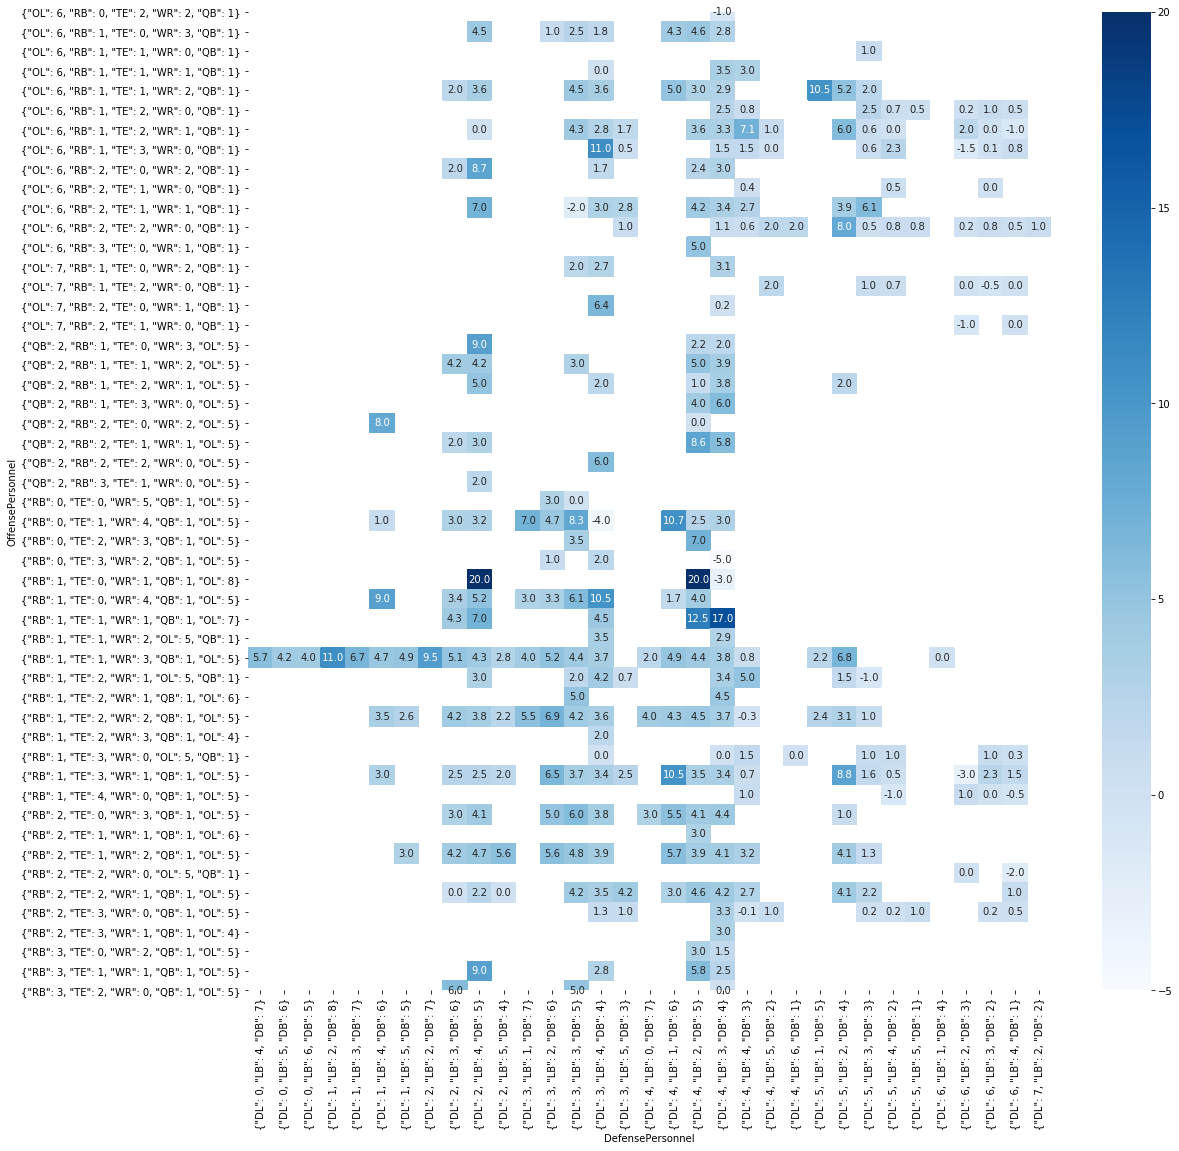

In [20]:
Personnel = rush_plays.groupby(['OffensePersonnel','DefensePersonnel']).mean()
Personnel = Personnel.reset_index()
Personnel2 = Personnel.pivot("OffensePersonnel", "DefensePersonnel", "Yards")
fig2,ax2 = plt.subplots(figsize=(18,18))
sns.heatmap(Personnel2,annot=True,cmap='Blues',fmt='.1f')
plt.show()
# when certain personnel of offense and defense meet, there are actually yards gaining differences. 
# For example if defensive team take the personnel 2DL 4LB 5DB, offense team choosing 1RB 1WR 1QB 8OL will likely
# gain a very high yards

In [21]:
offensive_Personnel = Personnel[['OffensePersonnel','Distance','DefendersInTheBox',\
                                 'Yards']].set_index('OffensePersonnel')

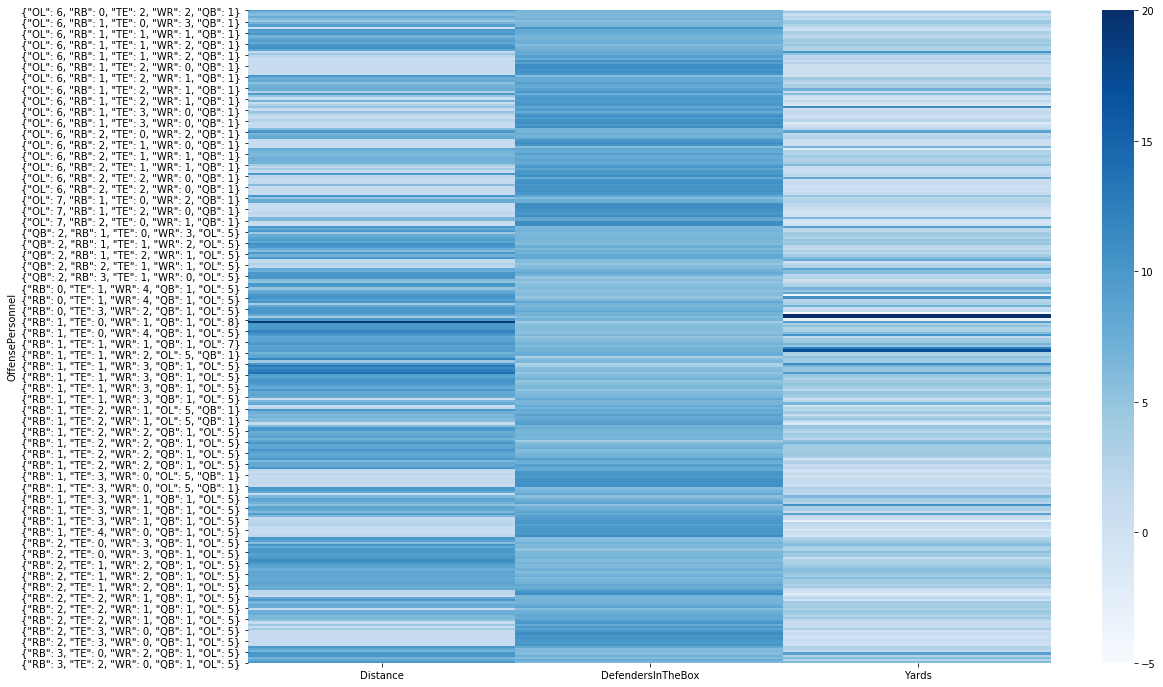

In [22]:
fig3,ax3 = plt.subplots(figsize=(18,12))
sns.heatmap(offensive_Personnel,cmap='Blues')
plt.show()
# There are some preference for possesion team to choose some certain personnel when they having different score

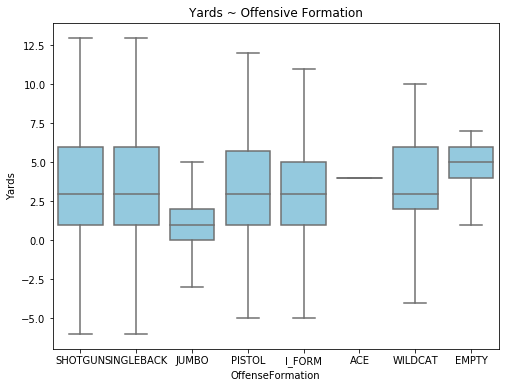

In [23]:
# boxplot with play-level data
fig4,ax4 = plt.subplots(figsize=(8,6))
# sns.boxplot(x="OffenseFormation", y="Yards", hue="outliers", \
#             data=rush_plays[rush_plays['outliers'] != -1], palette="Set1")
sns.boxplot(x="OffenseFormation", y="Yards",data=rush_plays, showfliers=False, color = "skyblue")
plt.title('Yards ~ Offensive Formation')
plt.show()

# sns.swarmplot(x="OffenseFormation", y="Yards",data=rush_plays, color=".25") # don't try this line
# Cannot really see a formation that can have higher yards

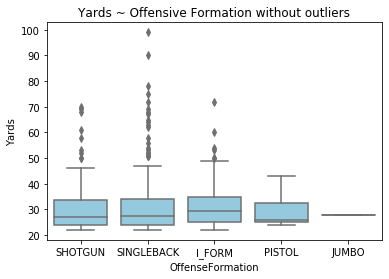

In [24]:
sns.boxplot(x="OffenseFormation", y="Yards", data=rush_plays[rush_plays['outliers'] == '1'], color = "skyblue")
plt.title('Yards ~ Offensive Formation without outliers')
plt.show()
# This might imply that these formations are preferred by the team gaining a extraordinary high yards.

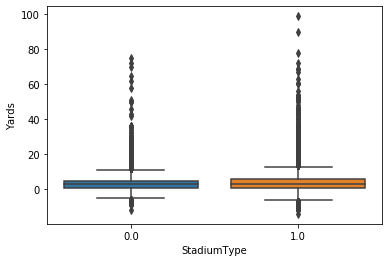

In [25]:
sns.boxplot(x="StadiumType", y="Yards",data=rush_plays)
# Yards on open stadium have wider spread

In [26]:
rush_plays.groupby('StadiumType').size()
# explained the wider spread of yards on open stadium

StadiumType
0.0     3721
1.0    16049
dtype: int64

In [27]:
# athlete_data
players_columns = ['NflId','DisplayName','PlayerHeight', 'PlayerWeight',\
                   'PlayerBMI','PlayerAge', 'Rusher', 'Yards'] 

In [28]:
players = rush[players_columns]
players.dtypes

NflId             int64
DisplayName      object
PlayerHeight      int64
PlayerWeight      int64
PlayerBMI       float64
PlayerAge       float64
Rusher             bool
Yards             int64
dtype: object

In [29]:
players[players['NflId']==496723]

,NflId,DisplayName,PlayerHeight,PlayerWeight,PlayerBMI,PlayerAge,Rusher,Yards


In [30]:
players_mean = players.groupby('NflId').mean()

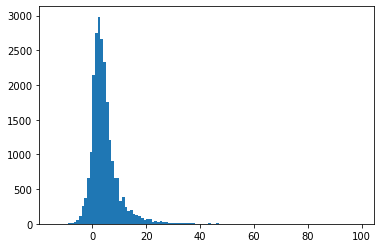

In [31]:
Player_Yards = plt.hist(players['Yards'],bins = np.arange(players['Yards'].values.min(),players['Yards'].values.max()+1))

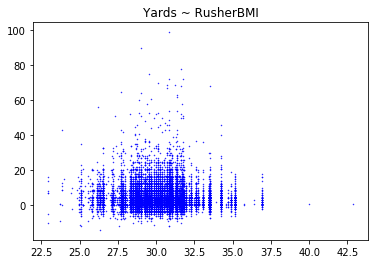

In [32]:
plt.scatter(players['PlayerBMI'], players['Yards'],s=0.2,c='b')
plt.title('Yards ~ RusherBMI')
plt.show()

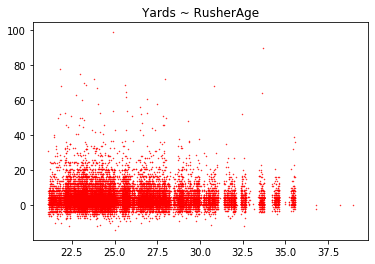

In [33]:

plt.scatter(players['PlayerAge'], players['Yards'],s=0.2, c='r')
plt.title('Yards ~ RusherAge')

# plt.scatter(x,y, c='b', marker='x', label='1')
# plt.scatter(x, y, c='r', marker='s', label='-1')
# plt.legend(loc='best')
plt.show()
# no obviouse relationship

(array([1.800e+01, 1.710e+02, 7.490e+02, 6.516e+03, 1.087e+04, 3.457e+03,
        1.096e+03, 6.700e+01, 1.000e+00, 1.000e+00]),
 array([3.13354022, 3.19593834, 3.25833646, 3.32073457, 3.38313269,
        3.4455308 , 3.50792892, 3.57032704, 3.63272515, 3.69512327,
        3.75752139]),
 <a list of 10 Patch objects>)

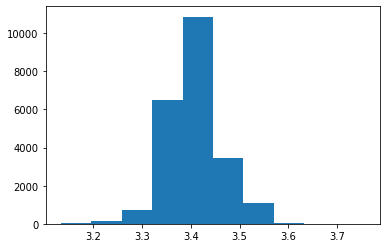

In [34]:
plt.hist(np.log(players['PlayerBMI']))

(array([2.3000e+01, 6.9000e+02, 4.1350e+03, 1.0361e+04, 6.4710e+03,
        9.9600e+02, 2.0500e+02, 6.3000e+01, 1.0000e+00, 1.0000e+00]),
 array([22.95510204, 24.94380236, 26.93250269, 28.92120301, 30.90990333,
        32.89860365, 34.88730397, 36.8760043 , 38.86470462, 40.85340494,
        42.84210526]),
 <a list of 10 Patch objects>)

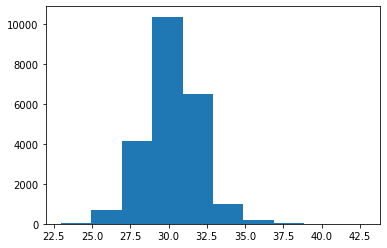

In [35]:
plt.hist(players['PlayerBMI'])

In [36]:
rusher = players.groupby('Rusher')
rusher

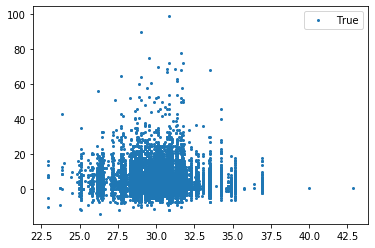

In [37]:
rusher = players.groupby('Rusher')

# Plot
fig6, ax6 = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in rusher:
  ax6.plot(group.PlayerBMI, group.Yards, marker='o', linestyle='', ms=2, label=name)
ax6.legend(loc = 'best')
plt.show()

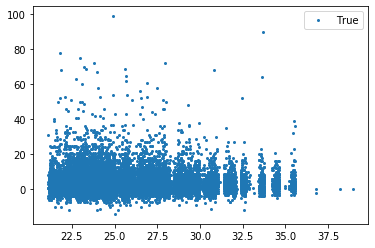

In [38]:
fig7, ax7 = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in rusher:
  ax7.plot(group.PlayerAge, group.Yards, marker='o', linestyle='', ms=2, label=name)
ax7.legend(loc = 'best')
plt.show()

In [39]:
# team ranking data analysis
team_scores = ['Off_Pass_Cmp', 'Off_Pass_Att', 'Off_Pass_CmpR',
       'Off_Pass_TD', 'Off_Pass_IntR', 'Off_Pass_SkR', 'Off_Pass_Yds',
       'Off_Pass_Y_G', 'Off_Pass_Y_A', 'Off_Pass_QBR', 'Off_Rush_Att',
       'Off_Rush_Yds', 'Off_Rush_Y_G', 'Off_Rush_Y_A', 'Off_Rush_TD',
       'Def_Pass_Cmp', 'Def_Pass_Att', 'Def_Pass_CmpR', 'Def_Pass_TD',
       'Def_Pass_IntR', 'Def_Pass_SkR', 'Def_Pass_Yds', 'Def_Pass_Y_G',
       'Def_Pass_Y_A', 'Def_Rush_Att', 'Def_Rush_Yds', 'Def_Rush_Y_G',
       'Def_Rush_Y_A', 'Def_Rush_TD','Yards']

In [40]:
team_scores = rush[team_scores]

In [41]:
names = team_scores.columns[:-1]
names

Index(['Off_Pass_Cmp', 'Off_Pass_Att', 'Off_Pass_CmpR', 'Off_Pass_TD',
       'Off_Pass_IntR', 'Off_Pass_SkR', 'Off_Pass_Yds', 'Off_Pass_Y_G',
       'Off_Pass_Y_A', 'Off_Pass_QBR', 'Off_Rush_Att', 'Off_Rush_Yds',
       'Off_Rush_Y_G', 'Off_Rush_Y_A', 'Off_Rush_TD', 'Def_Pass_Cmp',
       'Def_Pass_Att', 'Def_Pass_CmpR', 'Def_Pass_TD', 'Def_Pass_IntR',
       'Def_Pass_SkR', 'Def_Pass_Yds', 'Def_Pass_Y_G', 'Def_Pass_Y_A',
       'Def_Rush_Att', 'Def_Rush_Yds', 'Def_Rush_Y_G', 'Def_Rush_Y_A',
       'Def_Rush_TD'],
      dtype='object')

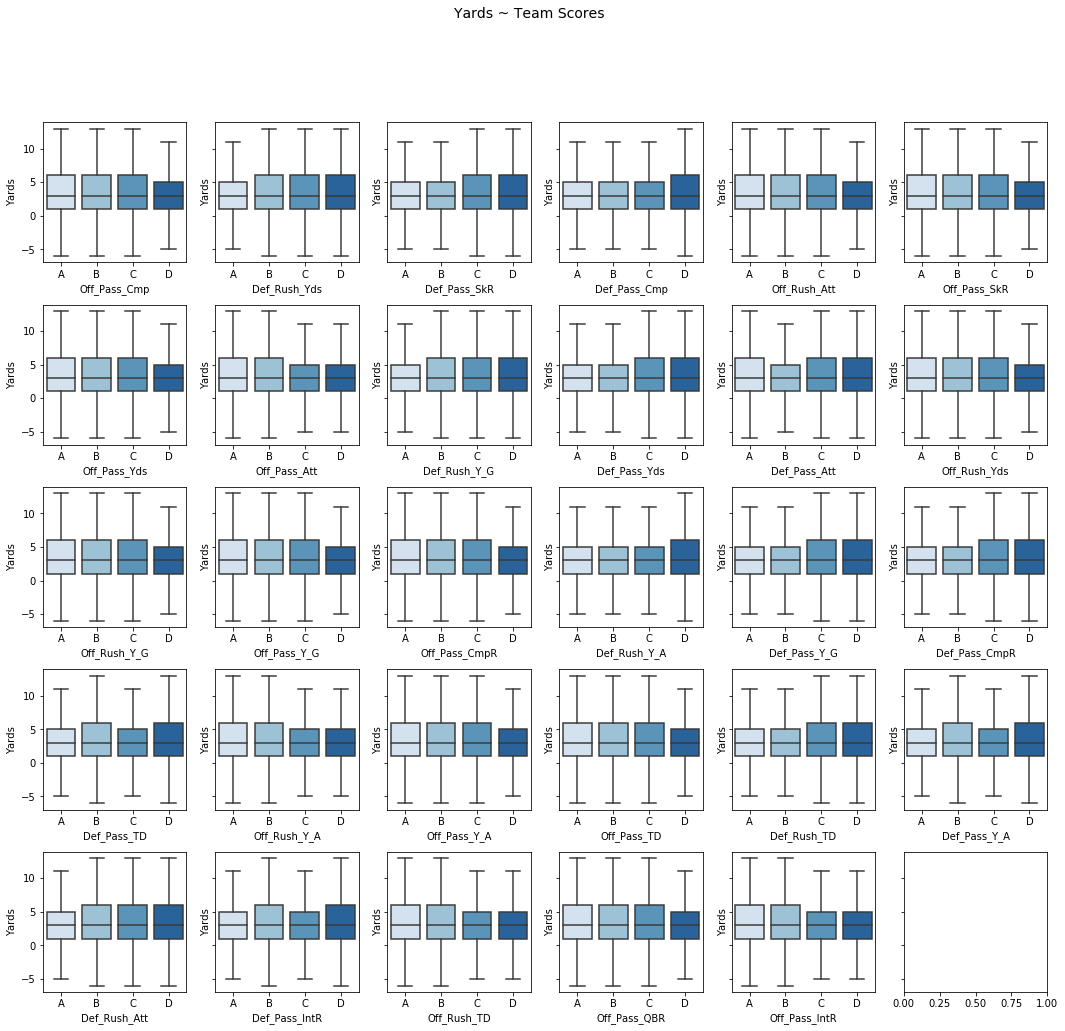

In [42]:
names = list(team_scores.columns[:-1])
colors = ["windows blue", "greyish", "faded green", "dusty purple"]
fig8,axes = plt.subplots(5, 6,figsize=(18,16),sharey=True)
# st = fig.suptitle("suptitle", fontsize="x-large")
# sns.set_style("darkgrid")
# sns.boxplot(x="OffenseFormation", y="Yards", data=rush_plays[rush_plays['outliers'] == '1'], color = "skyblue")
# sns.boxplot( x="Off_Pass_Cmp", y="Yards", data=team_scores)
# sns.boxplot( x="Off_Pass_Cmp", y="Yards", data=team_scores,  orient='v' , ax=axes[0])
# flatui = ["#95a5a6",  "#34495e"]
# palette=sns.xkcd_palette(colors)
for i,t in enumerate(names):
    sns.boxplot(x = t,  y='Yards', data=team_scores, order=["A", "B",'C','D'], orient='v', ax=axes[i % 5, i % 6],showfliers=False, palette='Blues')

plt.suptitle('Yards ~ Team Scores', fontsize=14)
plt.subplots_adjust(hspace=0.3)
plt.show()
# axes[0,0].boxplot(team_scores["Off_Pass_Cmp"], team_scores["Yards"])